In [1]:
#import all required libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
# Load the data
data = pd.read_csv('insurance.csv')

# Display the first few rows of the dataframe
print(data.head())

# Display basic information about the dataframe
print(data.info())

# Display summary statistics
print(data.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Handle missing values (example: filling with mean or dropping)
data = data.dropna()  # Dropping rows with missing values (can be replaced with other methods)

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Duplicates: {duplicates}")

# Remove duplicates
data = data.drop_duplicates()

# Convert data types if necessary
# Example: converting 'age' column to integer
# data['age'] = data['age'].astype(int)

# Verify changes
print(data.info())


Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Duplicates: 1
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None


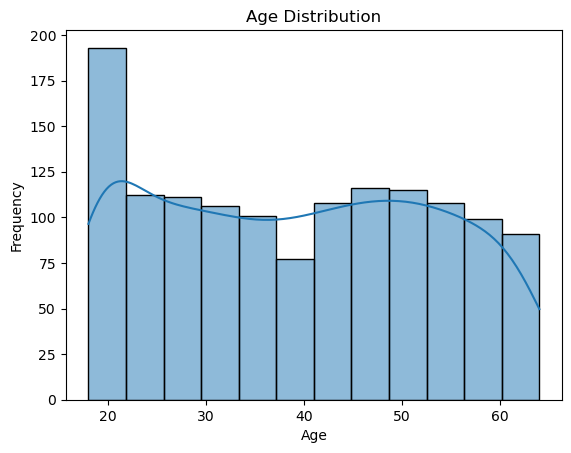

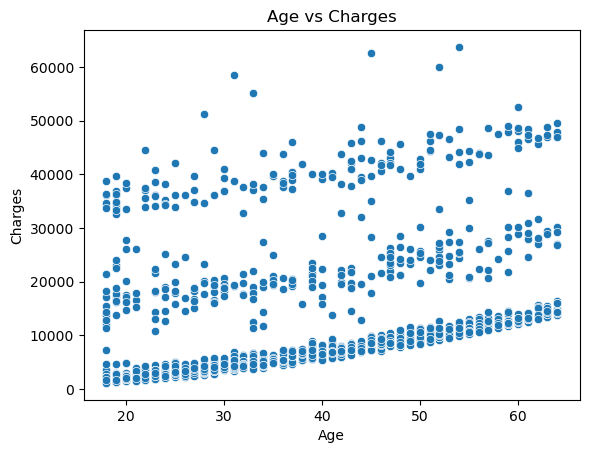

In [4]:
# Univariate analysis
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bivariate analysis
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [5]:
# Example: T-test to compare charges between smokers and non-smokers
smokers = data[data['smoker'] == 'yes']['charges']
non_smokers = data[data['smoker'] == 'no']['charges']

t_stat, p_value = stats.ttest_ind(smokers, non_smokers)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

# compare charges across different regions
anova_result = stats.f_oneway(data[data['region'] == 'northeast']['charges'],
                              data[data['region'] == 'northwest']['charges'],
                              data[data['region'] == 'southeast']['charges'],
                              data[data['region'] == 'southwest']['charges'])
print(f"ANOVA results: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


T-test results: t-statistic = 46.64479459840305, p-value = 1.4067220949376498e-282
ANOVA results: F-statistic = 2.926139903662777, p-value = 0.03276288025444947


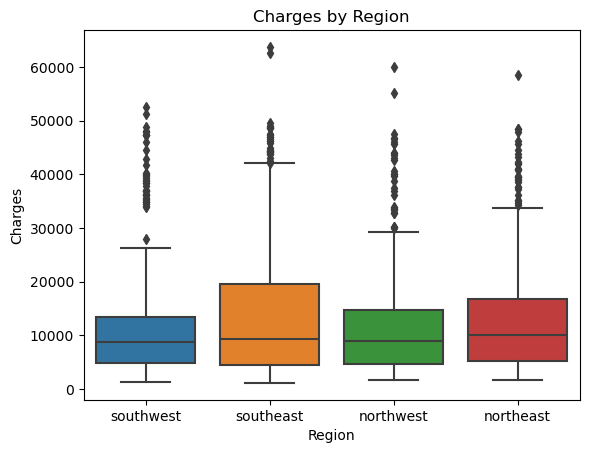

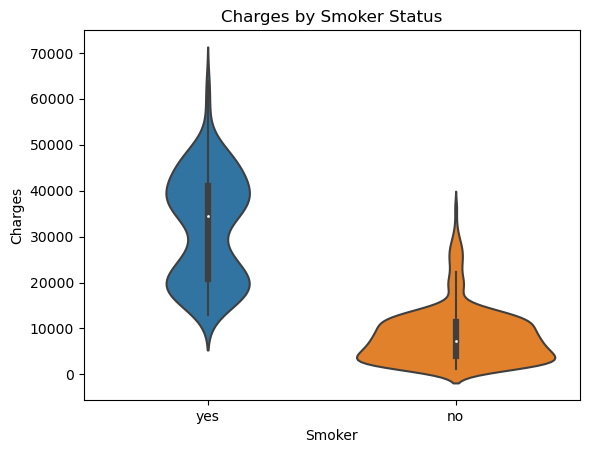

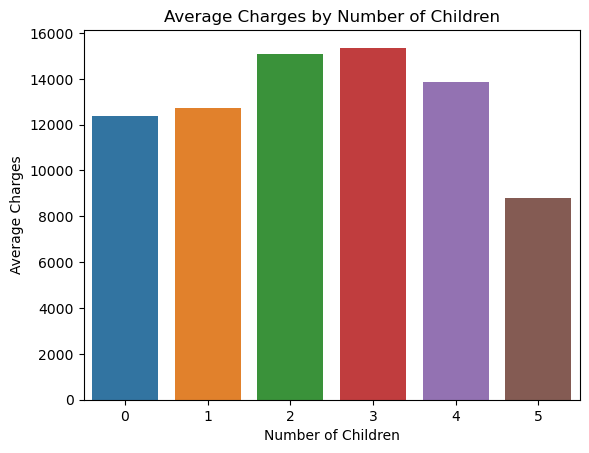

In [6]:
# Boxplot for charges by region
sns.boxplot(x='region', y='charges', data=data)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

# Violin plot for charges by smoker status
sns.violinplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Bar plot for average charges by number of children
average_charges_by_children = data.groupby('children')['charges'].mean().reset_index()
sns.barplot(x='children', y='charges', data=average_charges_by_children)
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()
